In [2]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

csv_path = "/root/dataset/Manga109_landmark_annotated/Manga109_annotated.csv"
dataset_img_path = "/root/dataset/Manga109_landmark_annotated/images"
data = pd.read_csv(csv_path).values.tolist()

[41.3598233995585, 46.50772626931568, 50.95364238410596, 54.22958057395144, 59.84547461368653, 68.7373068432671, 77.62913907284768, 86.05298013245033, 97.28476821192054, 108.28256070640175, 117.87637969094922, 126.30022075055189, 135.42604856512142, 139.8719646799117, 142.67991169977924, 144.31788079470198, 143.84988962472406, 115.30242825607064, 59.84547461368653, 90.49889624724062, 97.05077262693156, 110.38852097130244, 123.0242825607064, 133.32008830022073, 135.66004415011037, 128.64017660044152, 115.06843267108168, 100.32671081677704, 95.17880794701986, 42.06181015452539, 45.1037527593819, 54.22958057395144, 61.48344370860927, 67.56732891832229, 69.439293598234, 68.03532008830021, 58.44150110375276, 50.25165562913907, 44.63576158940397, 80.6710816777042, 93.7748344370861, 109.2185430463576, 124.42825607064016, 137.53200883002208, 32.0, 37.84988962472406, 46.27373068432671, 55.39955849889625, 61.48344370860927, 70.84326710816777, 76.69315673289184, 78.33112582781457, 82.777041942604

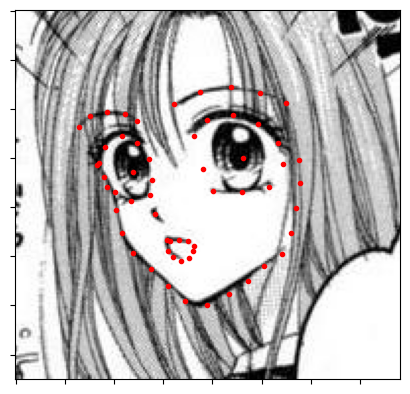

In [22]:
for image_landmark in data[10:11]:
    fig, ax = plt.subplots(1)
    ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    image_name = image_landmark[0]
    
    x_coordinates = image_landmark[1::2]
    y_coordinates = image_landmark[2::2]
    print(x_coordinates)
    print(y_coordinates)
    
    

    x_np = np.array(x_coordinates)
    y_np = np.array(y_coordinates)
    
    # for i, txt in enumerate(x_np):
    #     ax.annotate(i, (x_np[i], y_np[i]),color="blue")
    
    # landmarks = list(zip(x_coordinates, y_coordinates))
    
    img = Image.open(f"{dataset_img_path}/{image_name}")
    
    ax.imshow(img)
    
    plt.plot(x_np, y_np, 'o',color='red',markersize=3)  # 点と点を線でつなぐプロットを作成
    # plt.xlabel('x')
    # plt.ylabel('y')
    # plt.title('Coordinates')
    # plt.grid(True)
    # plt.gca().invert_yaxis()
    
    
    plt.savefig("line.png")
    
    plt.show()
    
